In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [89]:
PokemonData = pd.read_csv("PokemonData.csv")

In [90]:
PokemonData

Number                  Name   Type 1                    Abilities   HP  \
0          1             Bulbasaur    Grass  ['Chlorophyll', 'Overgrow']   45   
1          2               Ivysaur    Grass  ['Chlorophyll', 'Overgrow']   60   
2          3              Venusaur    Grass  ['Chlorophyll', 'Overgrow']   80   
3          3         Mega Venusaur    Grass                ['Thick Fat']   80   
4          4            Charmander     Fire     ['Blaze', 'Solar Power']   39   
...      ...                   ...      ...                          ...  ...   
1027     896             Glastrier      Ice           ['Chilling Neigh']  100   
1028     897             Spectrier    Ghost               ['Grim Neigh']  100   
1029     898               Calyrex  Psychic                  ['Unnerve']  100   
1030     898     Calyrex Ice Rider  Psychic                   ['As One']  100   
1031     898  Calyrex Shadow Rider  Psychic                   ['As One']  100   

      Att  Def  Spa  Spd  Spe  ...  Standard Deviation  Generation  \
0      49   49   65   65   45  ...            8.640988         1.0   
1      62   63   80   80   60  ...            8.902247         1.0   
2      82   83  100  100   80  ...            8.902247         1.0   
3     100  123  122  120   80  ...           18.747592         6.0   
4      52   43   60   50   65  ...            8.995369         1.0   
...   ...  ...  ...  ...  ...  ...                 ...         ...   
1027  145  130   65  110   30  ...           38.908725         8.0   
1028   65   60  145   80  130  ...           31.841622         8.0   
1029   80   80   80   80   80  ...            7.453560         8.0   
1030  165  150   85  130   50  ...           39.334746         8.0   
1031   85   80  165  100  150  ...           32.360813         8.0   

      Experience type  Experience to level 100 Final Evolution  Catch Rate  \
0         Medium Slow                  1059860             0.0          45   
1         Medium Slow                  1059860             0.0          45   
2         Medium Slow                  1059860             1.0          45   
3         Medium Slow                  1059860             1.0          45   
4         Medium Slow                  1059860             0.0          45   
...               ...                      ...             ...         ...   
1027             Slow                  1250000             1.0           3   
1028             Slow                  1250000             1.0           3   
1029             Slow                  1250000             1.0           3   
1030             Slow                  1250000             1.0           3   
1031             Slow                  1250000             1.0           3   

      Legendary  Height  Weight    BMI  
0           0.0     0.7     6.9   14.1  
1           0.0     1.0    13.0   13.0  
2           0.0     2.0   100.0   25.0  
3           0.0     2.4   155.5   27.0  
4           0.0     0.6     8.5   23.6  
...         ...     ...     ...    ...  
1027        1.0     2.2   800.0  165.3  
1028        1.0     2.0    44.5   11.1  
1029        1.0     1.1     7.7    6.4  
1030        1.0     2.4   809.1  140.5  
1031        1.0     2.4    53.6    9.3  

[1032 rows x 22 columns]

Axes(0.125,0.11;0.775x0.77)


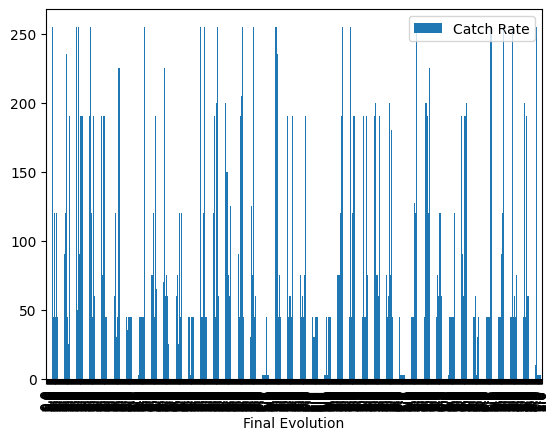

In [91]:
print(PokemonData.plot.bar(x = "Final Evolution", y= "Catch Rate"))

79.22705314009661


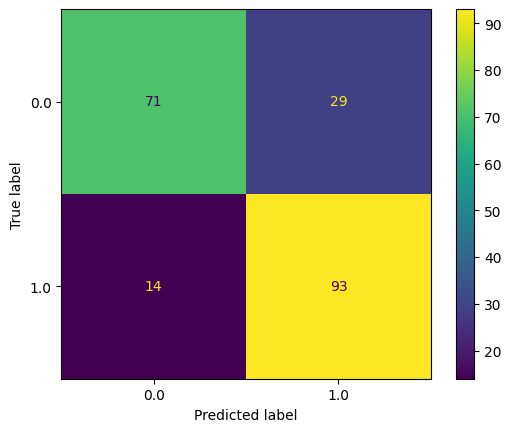

In [92]:
y = PokemonData["Final Evolution"]
x = PokemonData[["Spa","Spd"]]

xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size = 0.2)
PokemonData.corr(numeric_only = True)
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(accuracy*100)
ConfusionMatrixDisplay.from_estimator(knn, xtest,ytest)

In [93]:
print(y)

0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1027    1.0
1028    1.0
1029    1.0
1030    1.0
1031    1.0
Name: Final Evolution, Length: 1032, dtype: float64


In [112]:
clf2 = tree.DecisionTreeClassifier()
clf2.fit(x,y)

DecisionTreeClassifier()

[Text(0.5992532230958847, 0.9782608695652174, 'x[0] <= 116.5\ngini = 0.929\nsamples = 1032\nvalue = [81, 46, 42, 59, 22, 42, 64, 8, 41, 91, 41, 38\n114, 40, 77, 59, 36, 131]'),
 Text(0.2692654621440106, 0.9347826086956522, 'x[0] <= 35.5\ngini = 0.925\nsamples = 876\nvalue = [69, 38, 24, 57, 18, 24, 55, 8, 39, 85, 30, 31\n103, 40, 65, 43, 28, 119]'),
 Text(0.43425934261994764, 0.9565217391304348, 'True  '),
 Text(0.02489479350166373, 0.8913043478260869, 'x[1] <= 30.5\ngini = 0.855\nsamples = 73\nvalue = [18, 3, 0, 2, 2, 1, 1, 1, 3, 8, 0, 2, 8, 0\n15, 0, 1, 8]'),
 Text(0.010178117048346057, 0.8478260869565217, 'x[0] <= 32.5\ngini = 0.587\nsamples = 15\nvalue = [9, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0\n0, 0, 0, 3]'),
 Text(0.008612252887062048, 0.8043478260869565, 'x[0] <= 15.0\ngini = 0.72\nsamples = 10\nvalue = [4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0\n0, 0, 0, 3]'),
 Text(0.007046388725778039, 0.7608695652173914, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

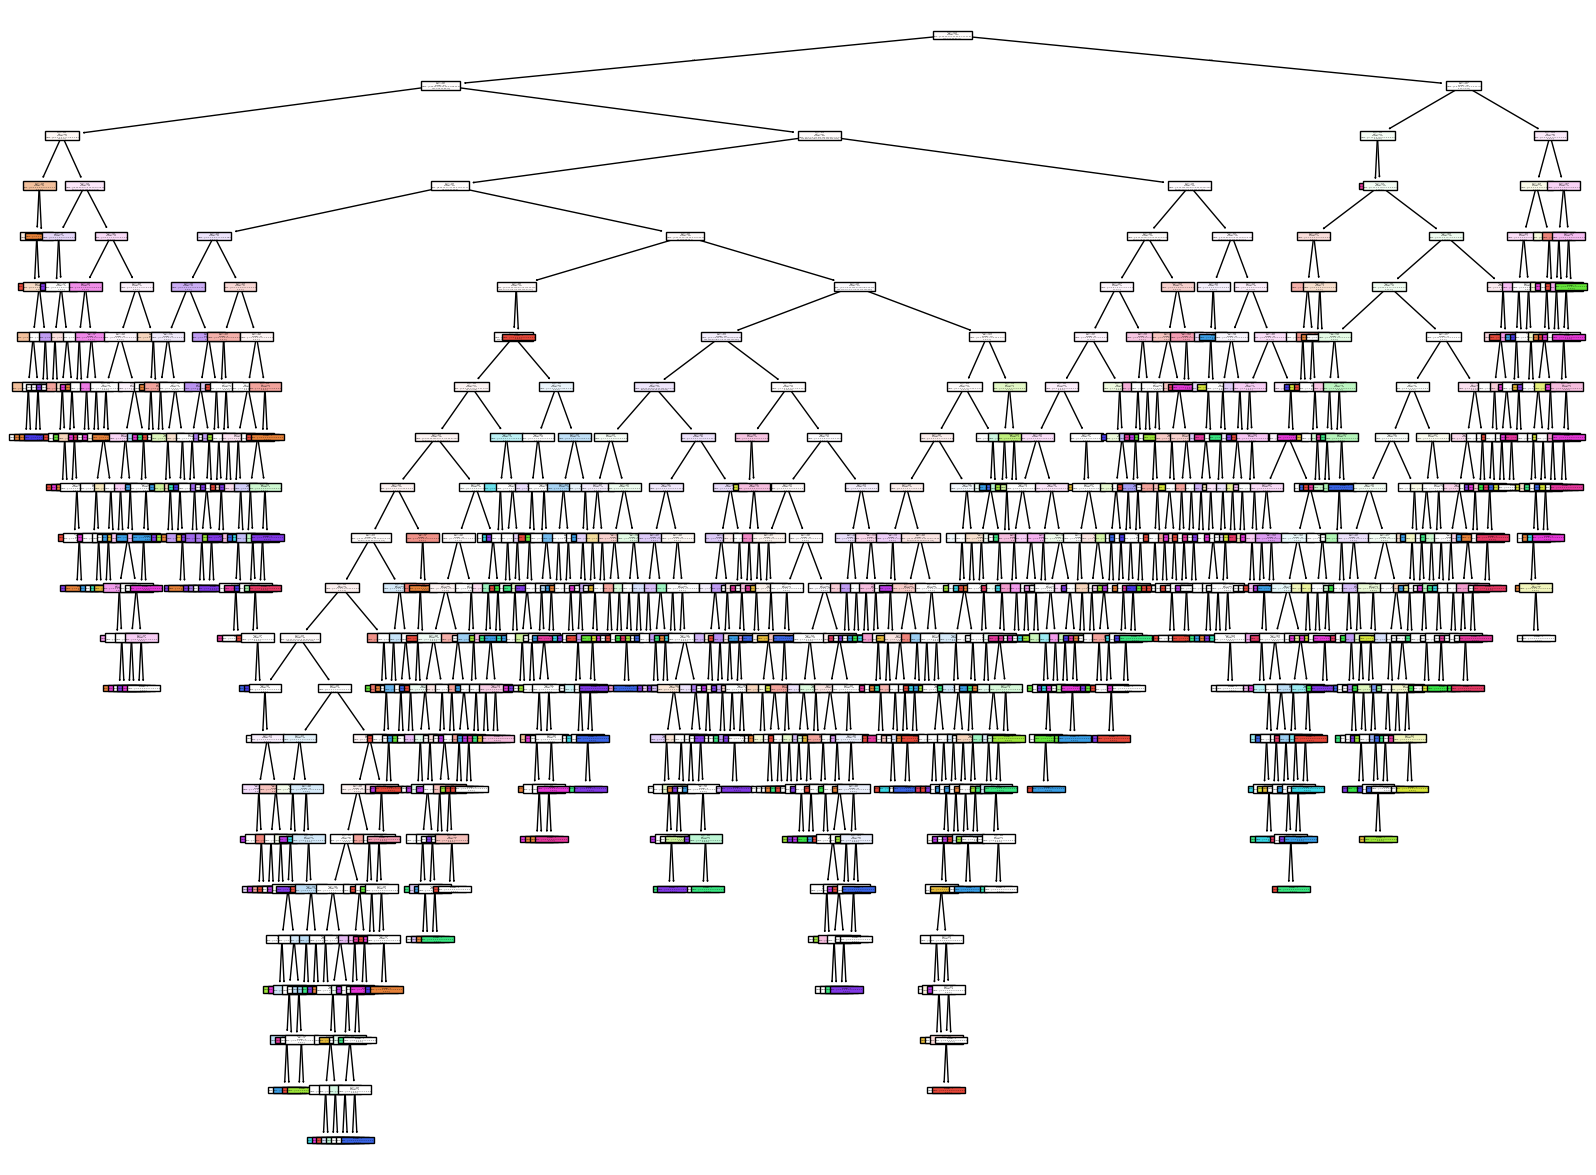

In [114]:

plt.figure(figsize=(20,15))
tree.plot_tree(clf2, filled=True)


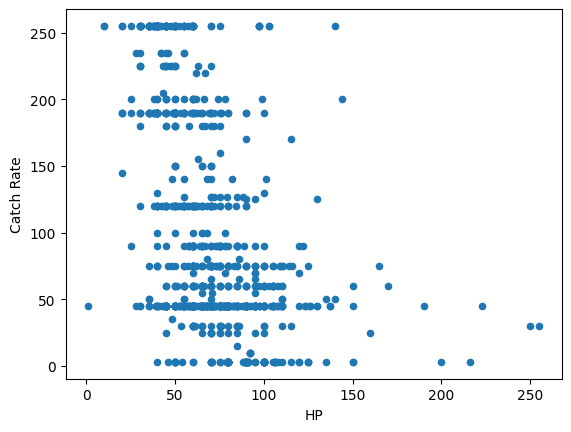

In [96]:
PokemonData.plot.scatter("HP", "Catch Rate")
plt.show()

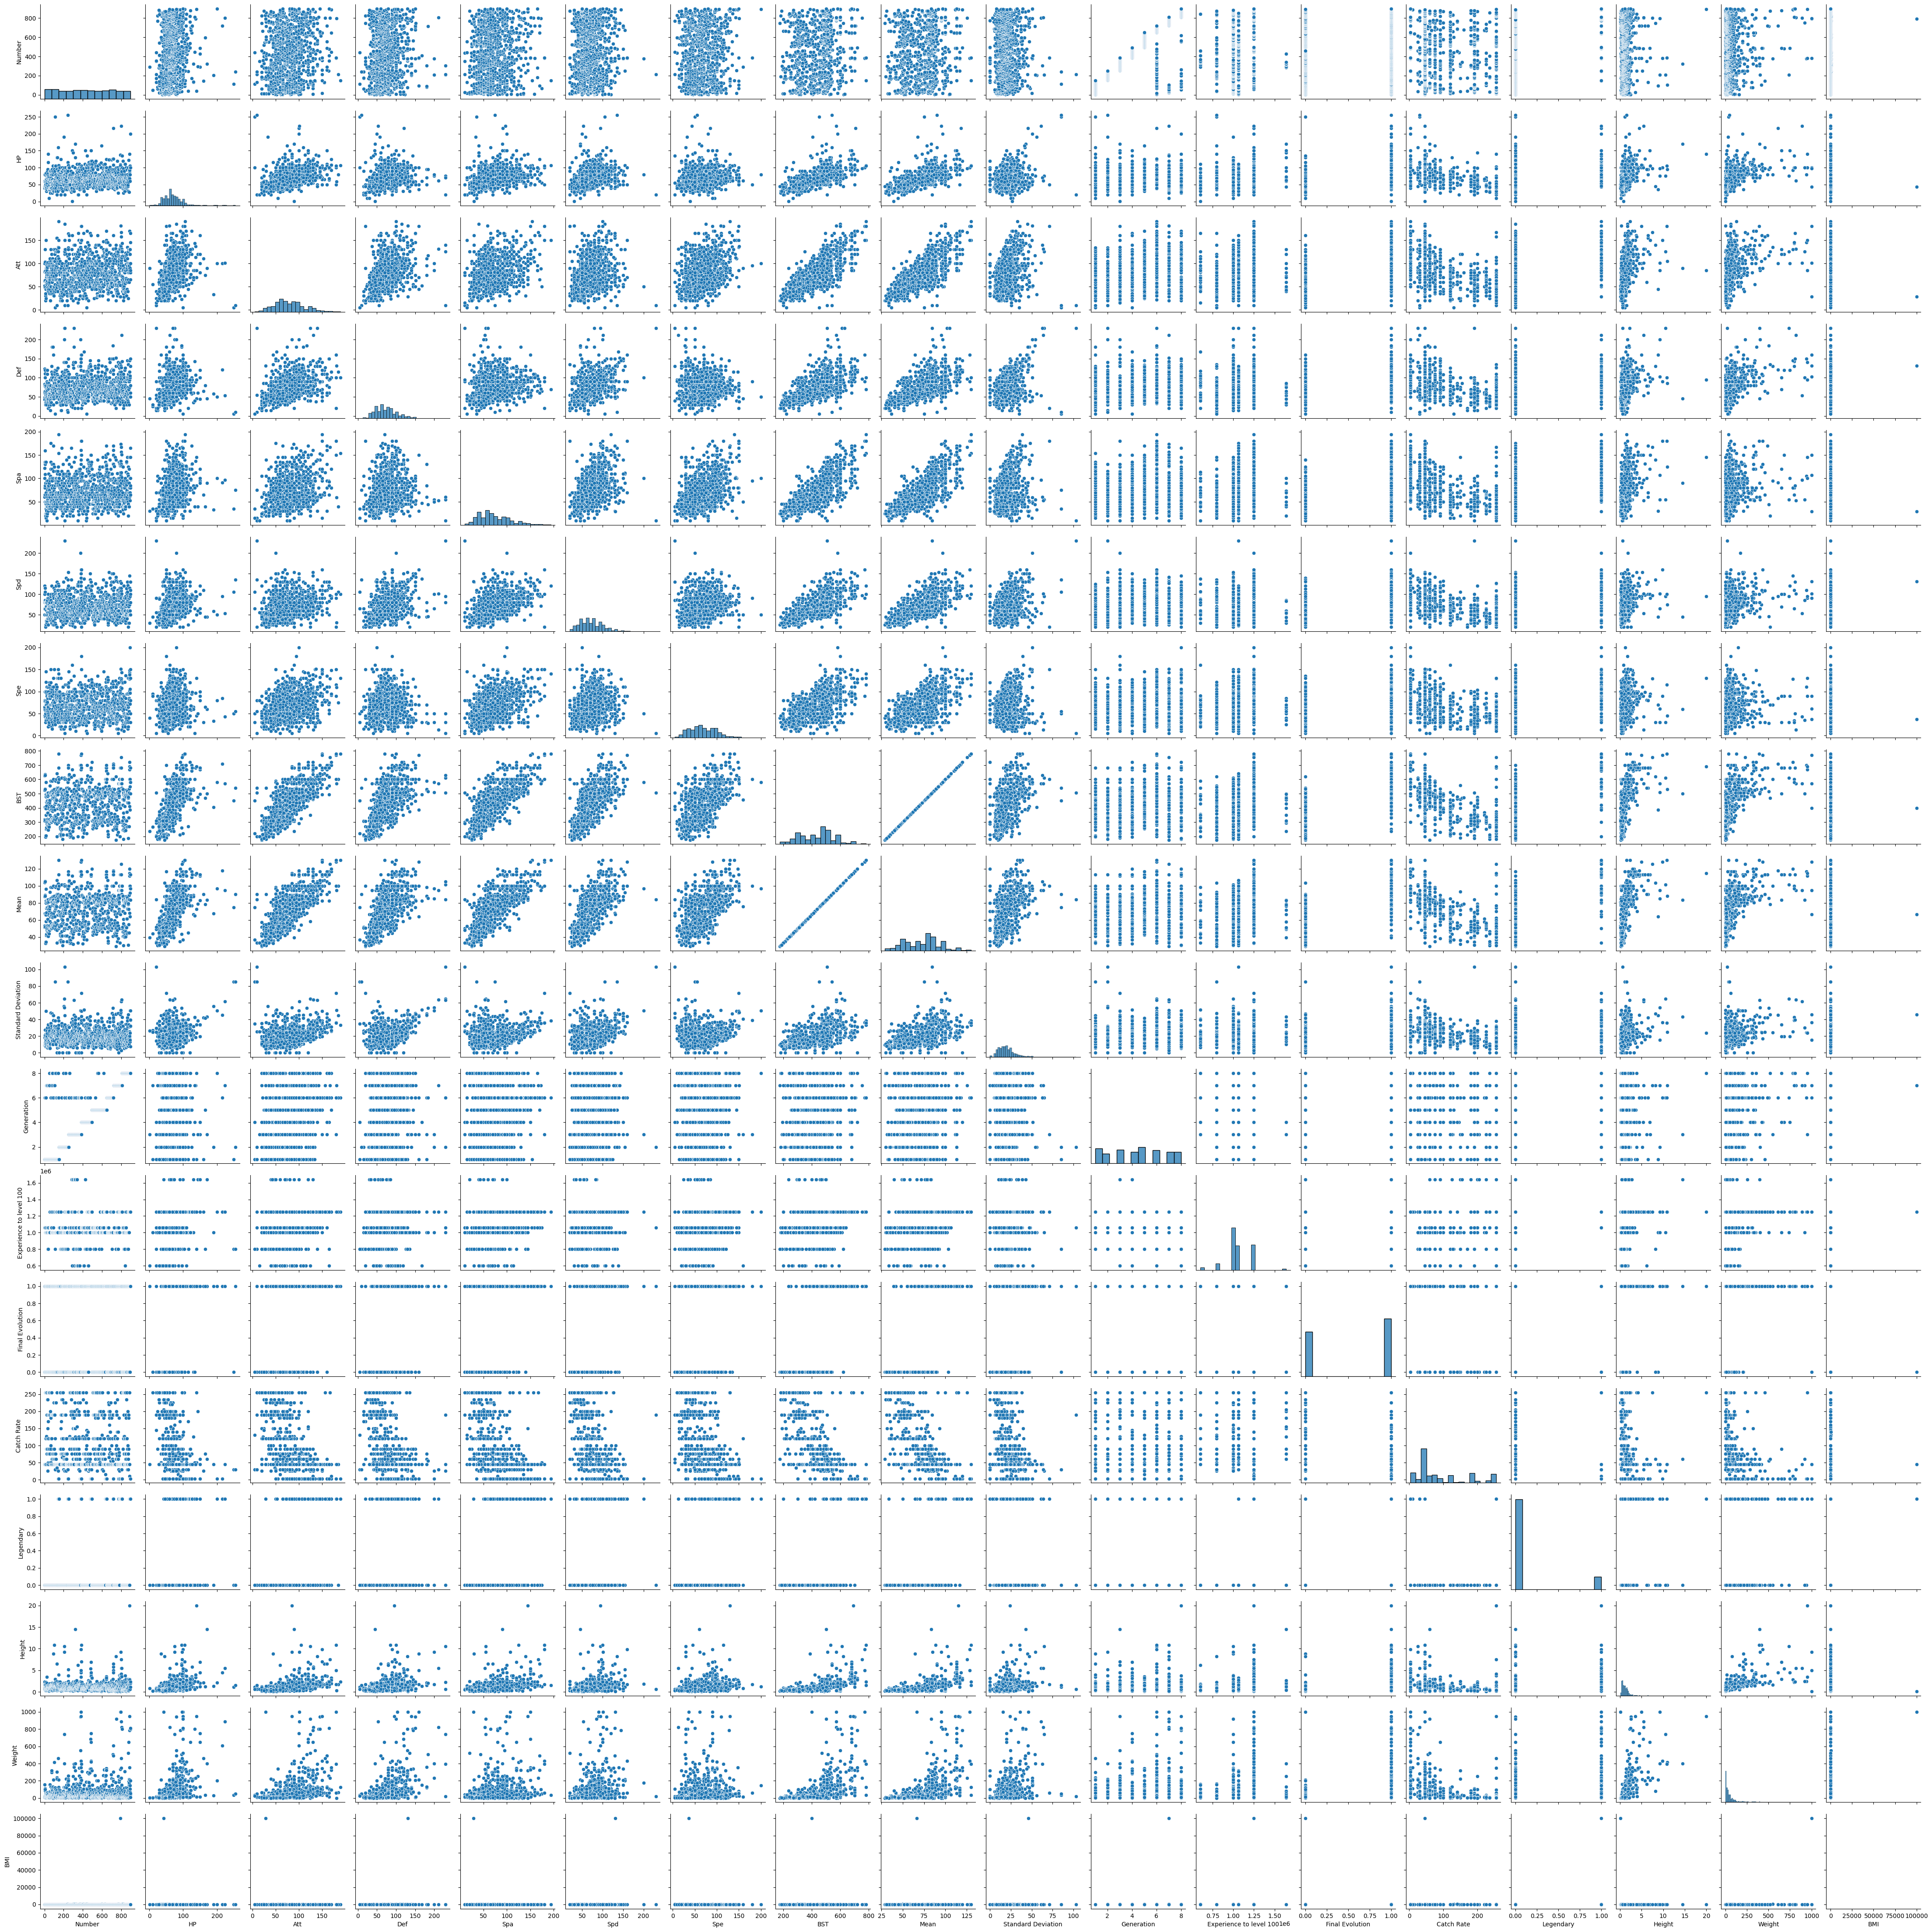

In [97]:
sns.pairplot(PokemonData)

In [98]:
X = PokemonData[["HP","Att"]]
y = PokemonData["Legendary"]

print (x.loc[0])

scaler = StandardScaler()
X = scaler.fit_transform(X)
                        

Xtrain, Xtest, ytrain,ytest = train_test_split(X,y, test_size = 0.2)
mlp_regress = MLPRegressor(hidden_layer_sizes = [100,100,40], activation = "relu", max_iter = 5000, tol = 0.01)
mlp_regress.fit(Xtrain, ytrain)
y_pred = mlp_regress.predict(Xtest)

print("RMSE:", mean_squared_error(y_pred, ytest)**(0.5))

Spa    65
Spd    65
Name: 0, dtype: int64
RMSE: 0.2993319506379598


In [99]:
le = LabelEncoder()
PokemonData["Pokemon_Type_code"]= le.fit_transform(PokemonData["Type 1"])

In [100]:
PokemonData

Number                  Name   Type 1                    Abilities   HP  \
0          1             Bulbasaur    Grass  ['Chlorophyll', 'Overgrow']   45   
1          2               Ivysaur    Grass  ['Chlorophyll', 'Overgrow']   60   
2          3              Venusaur    Grass  ['Chlorophyll', 'Overgrow']   80   
3          3         Mega Venusaur    Grass                ['Thick Fat']   80   
4          4            Charmander     Fire     ['Blaze', 'Solar Power']   39   
...      ...                   ...      ...                          ...  ...   
1027     896             Glastrier      Ice           ['Chilling Neigh']  100   
1028     897             Spectrier    Ghost               ['Grim Neigh']  100   
1029     898               Calyrex  Psychic                  ['Unnerve']  100   
1030     898     Calyrex Ice Rider  Psychic                   ['As One']  100   
1031     898  Calyrex Shadow Rider  Psychic                   ['As One']  100   

      Att  Def  Spa  Spd  Spe  ...  Generation  Experience type  \
0      49   49   65   65   45  ...         1.0      Medium Slow   
1      62   63   80   80   60  ...         1.0      Medium Slow   
2      82   83  100  100   80  ...         1.0      Medium Slow   
3     100  123  122  120   80  ...         6.0      Medium Slow   
4      52   43   60   50   65  ...         1.0      Medium Slow   
...   ...  ...  ...  ...  ...  ...         ...              ...   
1027  145  130   65  110   30  ...         8.0             Slow   
1028   65   60  145   80  130  ...         8.0             Slow   
1029   80   80   80   80   80  ...         8.0             Slow   
1030  165  150   85  130   50  ...         8.0             Slow   
1031   85   80  165  100  150  ...         8.0             Slow   

      Experience to level 100  Final Evolution Catch Rate  Legendary  Height  \
0                     1059860              0.0         45        0.0     0.7   
1                     1059860              0.0         45        0.0     1.0   
2                     1059860              1.0         45        0.0     2.0   
3                     1059860              1.0         45        0.0     2.4   
4                     1059860              0.0         45        0.0     0.6   
...                       ...              ...        ...        ...     ...   
1027                  1250000              1.0          3        1.0     2.2   
1028                  1250000              1.0          3        1.0     2.0   
1029                  1250000              1.0          3        1.0     1.1   
1030                  1250000              1.0          3        1.0     2.4   
1031                  1250000              1.0          3        1.0     2.4   

      Weight    BMI  Pokemon_Type_code  
0        6.9   14.1                  9  
1       13.0   13.0                  9  
2      100.0   25.0                  9  
3      155.5   27.0                  9  
4        8.5   23.6                  6  
...      ...    ...                ...  
1027   800.0  165.3                 11  
1028    44.5   11.1                  8  
1029     7.7    6.4                 14  
1030   809.1  140.5                 14  
1031    53.6    9.3                 14  

[1032 rows x 23 columns]

In [105]:
y = PokemonData["Pokemon_Type_code"]
x = PokemonData[["Spd","HP", "Att"]]

print (x.loc[0])

scaler = StandardScaler()
Z = scaler.fit_transform(x)

print(Z[0])
                        

xtrain, xtest, ytrain,ytest = train_test_split(Z,y, test_size = 0.2)

Spd    65
HP     45
Att    49
Name: 0, dtype: int64
[-0.25856181 -0.95146572 -0.96924239]


6.763285024154589


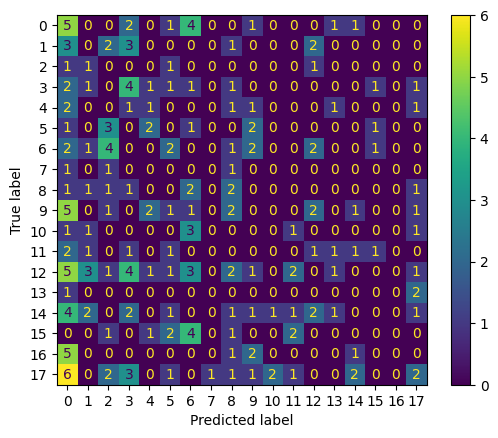

In [108]:
y = PokemonData["Pokemon_Type_code"]
x = PokemonData[["Att", "Spd"]]

xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size = 0.2)
PokemonData.corr(numeric_only = True)
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(accuracy*100)
ConfusionMatrixDisplay.from_estimator(knn, xtest,ytest)

In [103]:
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)
y_pred = linear_regression.predict(xtest)

In [104]:
error = mean_squared_error(ytest, y_pred)
print(error)

60.743698835255984


14.009661835748794


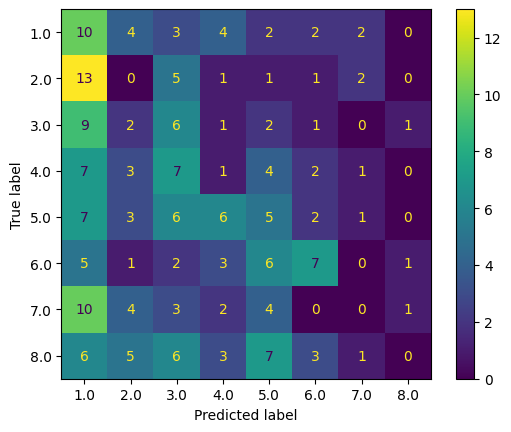

In [74]:
y = PokemonData["Generation"]
x = PokemonData[["BST","Att", "Spd"]]

xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size = 0.2)
PokemonData.corr(numeric_only = True)
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(accuracy*100)
ConfusionMatrixDisplay.from_estimator(knn, xtest,ytest)

In [82]:
gnb = GaussianNB()
y_pred = gnb.fit(xtrain, ytrain).predict(xtest)
print("Number of mislabeled points out of a total %d points : %d"
      % (xtest.shape[0], (ytest != y_pred).sum()))

Number of mislabeled points out of a total 207 points : 162
